In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Convert 'quality' to binary classification (good wine: quality >= 6)
df['quality'] = (df['quality'] >= 6).astype(int)

In [4]:
X = df.drop('quality', axis=1)
y = df['quality']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
clf = DecisionTreeClassifier(random_state=42, max_depth=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [7]:
y_pred = clf.predict(X_test)

In [8]:
# Classification metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.77      0.71       141
           1       0.79      0.69      0.74       179

    accuracy                           0.72       320
   macro avg       0.73      0.73      0.72       320
weighted avg       0.73      0.72      0.73       320



In [9]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [10]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.725
Precision: 0.7935483870967742
Recall: 0.6871508379888268
F1 Score: 0.7365269461077845


In [11]:
# K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_accuracies = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')
cross_val_precisions = cross_val_score(clf, X, y, cv=kf, scoring='precision')
cross_val_recalls = cross_val_score(clf, X, y, cv=kf, scoring='recall')
cross_val_f1s = cross_val_score(clf, X, y, cv=kf, scoring='f1')

In [12]:
print(f"Cross-Validation Accuracy: {cross_val_accuracies.mean()}")
print(f"Cross-Validation Precision: {cross_val_precisions.mean()}")
print(f"Cross-Validation Recall: {cross_val_recalls.mean()}")
print(f"Cross-Validation F1 Score: {cross_val_f1s.mean()}")

Cross-Validation Accuracy: 0.7110854231974921
Cross-Validation Precision: 0.7392989425690283
Cross-Validation Recall: 0.7159582596694296
Cross-Validation F1 Score: 0.7236248046511556


In [13]:
# Displaying the decision tree structure
print("Decision Tree Structure:")
print(export_text(clf, feature_names=list(X.columns)))

Decision Tree Structure:
|--- alcohol <= 10.53
|   |--- sulphates <= 0.57
|   |   |--- alcohol <= 9.75
|   |   |   |--- pH <= 3.54
|   |   |   |   |--- residual sugar <= 4.85
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- residual sugar >  4.85
|   |   |   |   |   |--- class: 0
|   |   |   |--- pH >  3.54
|   |   |   |   |--- class: 1
|   |   |--- alcohol >  9.75
|   |   |   |--- sulphates <= 0.53
|   |   |   |   |--- volatile acidity <= 0.34
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- volatile acidity >  0.34
|   |   |   |   |   |--- class: 0
|   |   |   |--- sulphates >  0.53
|   |   |   |   |--- density <= 1.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- density >  1.00
|   |   |   |   |   |--- class: 0
|   |--- sulphates >  0.57
|   |   |--- total sulfur dioxide <= 81.50
|   |   |   |--- volatile acidity <= 0.53
|   |   |   |   |--- sulphates <= 0.64
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- sulphates >  0.64
|   |   |   |   |   |--- class

C:\Users\debsa\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


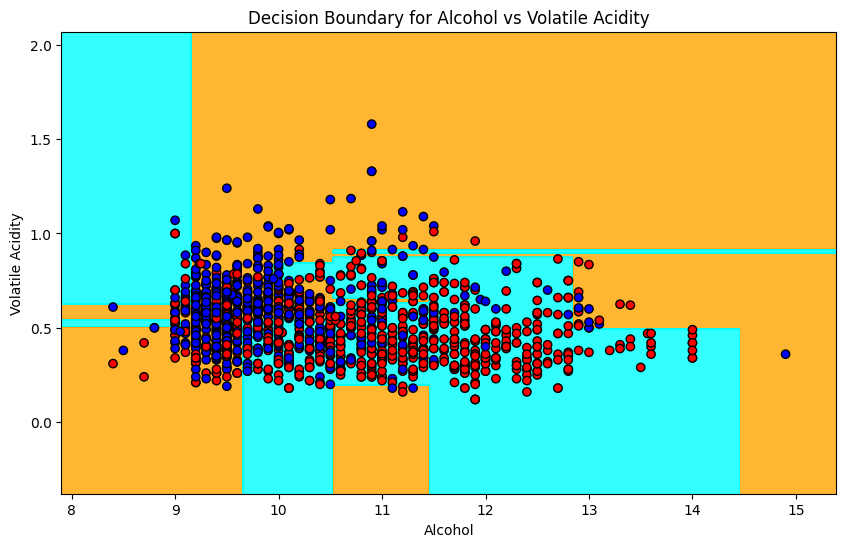

In [14]:
# Visualizing the decision boundary 
X_2d = X[['alcohol', 'volatile acidity']]
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d, y, test_size=0.2, random_state=42)
clf_2d = DecisionTreeClassifier(random_state=42, max_depth=5)
clf_2d.fit(X_train_2d, y_train_2d)

x_min, x_max = X_2d.iloc[:, 0].min() - 0.5, X_2d.iloc[:, 0].max() + 0.5
y_min, y_max = X_2d.iloc[:, 1].min() - 0.5, X_2d.iloc[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = clf_2d.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(('orange', 'cyan')))
plt.scatter(X_2d['alcohol'], X_2d['volatile acidity'], c=y, edgecolors='k', cmap=ListedColormap(('blue', 'red')))
plt.title('Decision Boundary for Alcohol vs Volatile Acidity')
plt.xlabel('Alcohol')
plt.ylabel('Volatile Acidity')
plt.show()

In [15]:
# Entropy calculation for each attribute
def entropy(column):
    counts = column.value_counts(normalize=True)
    return -sum(counts * np.log2(counts + 1e-9))  # Adding a small constant to avoid log(0)

for col in X.columns:
    print(f"Entropy of {col}: {entropy(df[col])}")

Entropy of fixed acidity: 5.942586938850997
Entropy of volatile acidity: 6.387776641563735
Entropy of citric acid: 5.873671991793507
Entropy of residual sugar: 4.775932035811718
Entropy of chlorides: 6.21527946081687
Entropy of free sulfur dioxide: 5.076805550418419
Entropy of total sulfur dioxide: 6.602004619017433
Entropy of density: 7.95638350729974
Entropy of pH: 5.906657615651485
Entropy of sulphates: 5.731631638213242
Entropy of alcohol: 5.191458754966744


In [16]:
# Finding and displaying the root node feature
root_feature_index = clf.tree_.feature[0]
root_feature_name = X.columns[root_feature_index] if root_feature_index != -2 else "No root feature (tree not split)"
print(f"Root Node Feature: {root_feature_name}")

Root Node Feature: alcohol
